In [1]:
import sys
sys.path.append('../utils/')
from helper_functions import *
from helper_plots import *
from multi_armed_environment import *
from multi_armed_epsilon_greedy import *
from multi_armed_ucb import *
import numpy as np

np.random.seed(0)

## Jupyter notebook containing all algorithms with their environment separated : 

#### Initialization of variables used

In [2]:
# sub-optimality gap
GAPS = [0.01, 0.02, 0.1, 0.2, 0.5]

In [3]:
n_simulations = 100
n_arms =  6
n_steps = 500
max_reward = 1.0
rewards_associated = np.ones(n_arms) # * max_reward * np.random.rand(n_arms)

# Probability distribution for small gap
true_probs_small_gap = [0.86734392, 0.66409692, 0.47770636, 0.65307993, 0.84734392, 0.13106454] # probability_distribution_by_gaps(n_arms, [0.02])[0] # np.random.rand(n_arms)

# Probability distribution for big gap
true_probs_big_gap = [0.2451019, 0.1434964, 0.34096024, 0.44358828, 0.4324698, 0.64358828] # probability_distribution_by_gaps(n_arms, [0.2])[0] # probability_distribution_by_gaps(n_arms, [0.02])[0] # np.random.rand(n_arms)


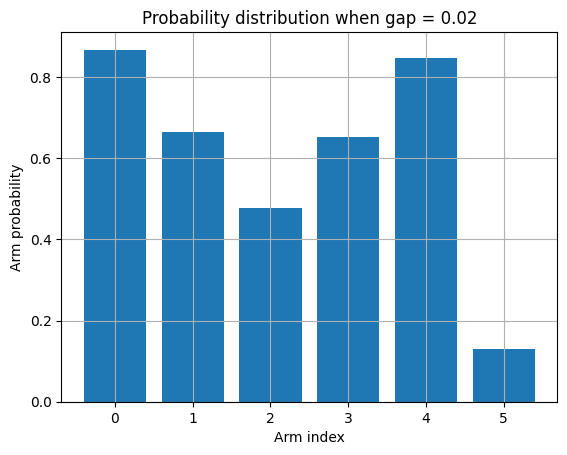

In [4]:
bar_plot(range(n_arms), true_probs_small_gap, x_label="Arm index", y_label="Arm probability", title="Probability distribution when gap = 0.02")

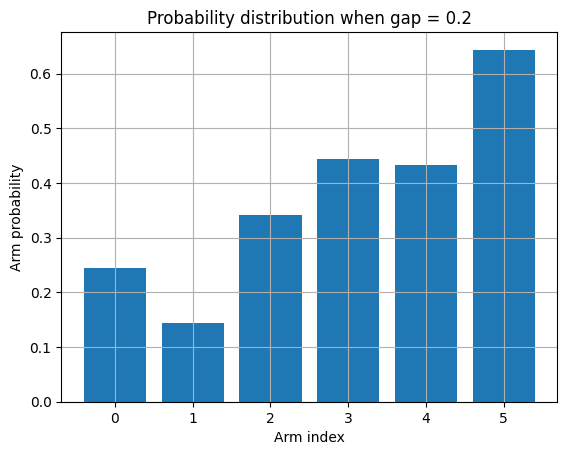

In [5]:
bar_plot(range(n_arms), true_probs_big_gap, x_label="Arm index", y_label="Arm probability", title="Probability distribution when gap = 0.2")

## Epsilon greedy

In [6]:
# Define values of epsilons that we will test
epsilons = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5]

#### with suboptimality gap 0.02

In [7]:
regrets = run_epsilon_greedy_for_different_epsilons(n_simulations, n_arms, n_steps, true_probs_small_gap, rewards_associated, epsilons)

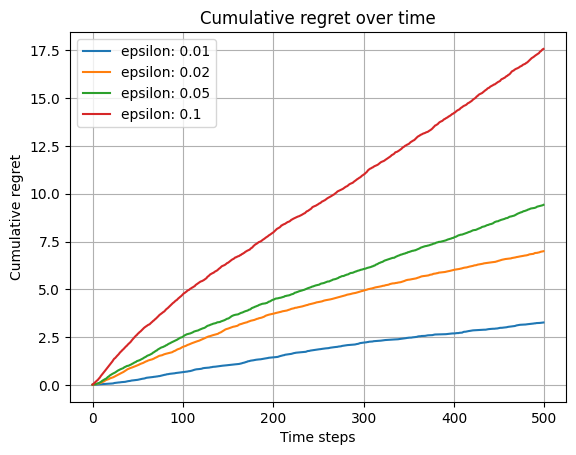

In [8]:
plot_multiple_lines(regrets[:4], list_of_labels_from_values_list(epsilons, "epsilon: "), 'Cumulative regret over time', 'Time steps', 'Cumulative regret')

#### with suboptimality gap 0.2

In [9]:
regrets = run_epsilon_greedy_for_different_epsilons(n_simulations, n_arms, n_steps, true_probs_big_gap, rewards_associated, epsilons)

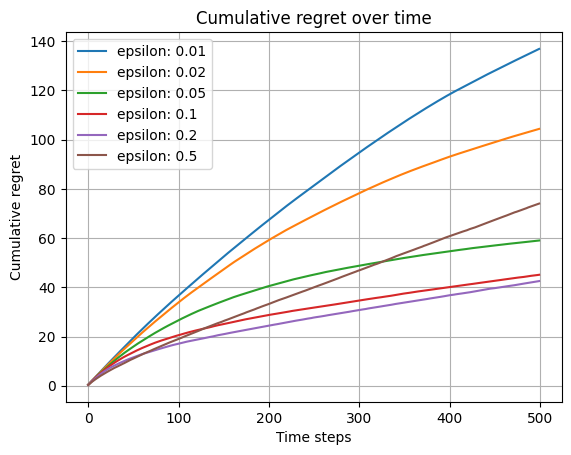

In [10]:
plot_multiple_lines(regrets, list_of_labels_from_values_list(epsilons, "epsilon: "), 'Cumulative regret over time', 'Time steps', 'Cumulative regret')

## Upper Confidence Bound


In [11]:

c_list = [0.01, 0.1, 0.5, 0.8, 0.9, 1.0, 2.0]


#### with suboptimality gap 0.02

In [12]:
regrets = run_multi_armed_ucb_average_for_different_c_values(n_simulations, n_arms, n_steps, true_probs_small_gap, rewards_associated, c_list)

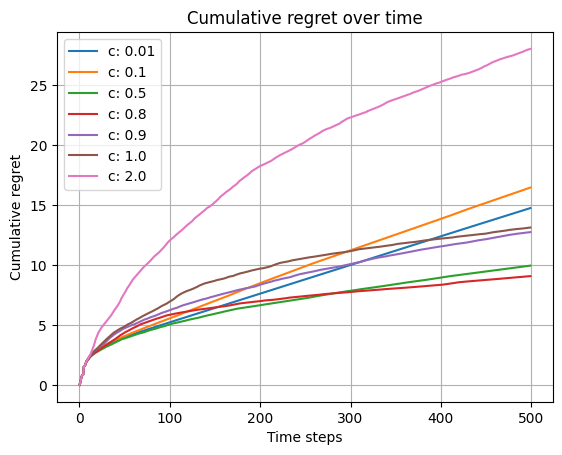

In [13]:
plot_multiple_lines(regrets, list_of_labels_from_values_list(c_list, "c: "), 'Cumulative regret over time', 'Time steps', 'Cumulative regret')

#### with suboptimality gap 0.2

In [14]:
regrets = run_multi_armed_ucb_average_for_different_c_values(n_simulations, n_arms, n_steps, true_probs_big_gap, rewards_associated, c_list)

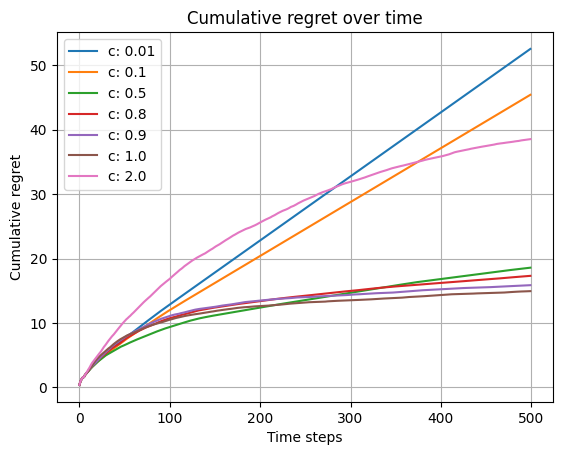

In [15]:
plot_multiple_lines(regrets, list_of_labels_from_values_list(c_list, "c: "), 'Cumulative regret over time', 'Time steps', 'Cumulative regret')